In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
from sklearn.datasets import load_diabetes 
data = load_diabetes()

In [3]:
print(load_diabetes)

<function load_diabetes at 0x7daa6b1c6830>


In [4]:
X = data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y ,test_size =0.2, random_state = 2)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
lr =LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
r2_score(y_test ,y_pred) ,np.sqrt(mean_squared_error(y_test,y_pred))

(0.4399338661568968, 55.627840795469155)

In [10]:
## using ridge 
from sklearn.linear_model import Ridge
r = Ridge()

In [11]:
r.fit(X_train,y_train)

Ridge()

In [12]:
y_pred1 = r.predict(X_test)

In [13]:
r2_score(y_test,y_pred1) ,np.sqrt(mean_squared_error(y_test,y_pred1))

(0.4078252224517157, 57.20019371687056)

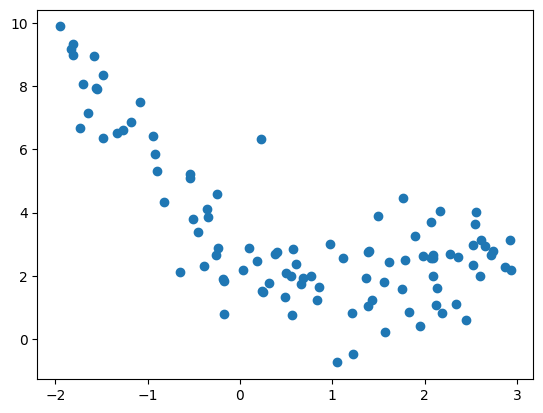

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

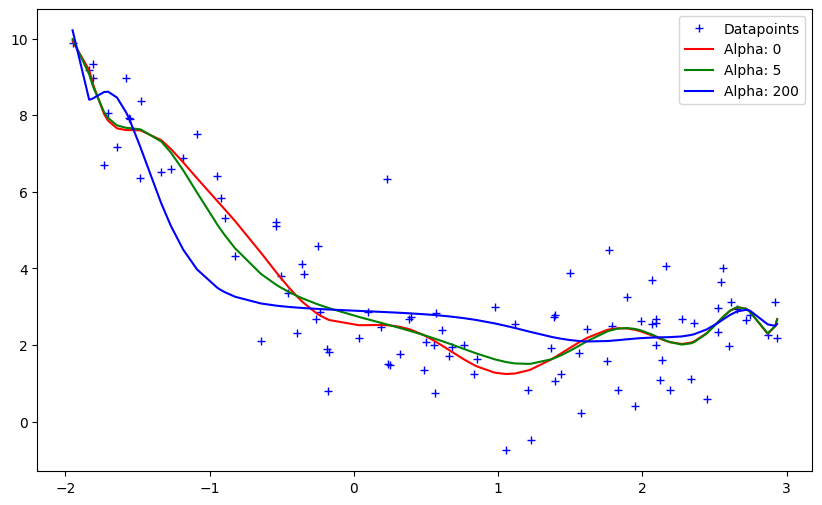

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 5, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()


### impliment our own ridge class


In [16]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np


In [17]:
X,y = make_regression(n_samples=100 , n_features= 1, n_informative=1,n_targets=1,noise= 20 ,random_state=13)

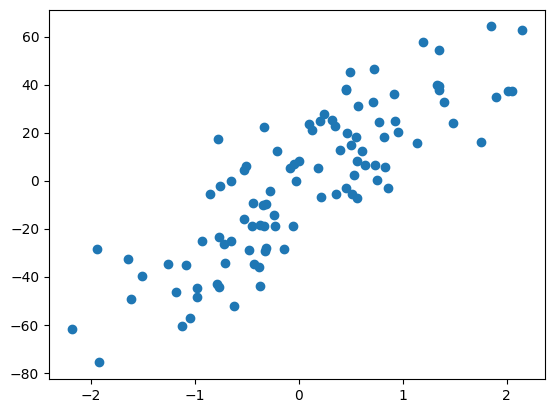

In [18]:
plt.scatter(X,y)

In [19]:
from sklearn.linear_model import LinearRegression

lr =LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [20]:
from sklearn.linear_model import Ridge

In [21]:
r1 = Ridge(alpha=10)
r1.fit(X,y)
print(r.coef_)
print(r.intercept_)

[  42.24252786  -57.30448273  282.1721254   198.0593951    14.36373444
  -22.55107873 -136.92968398  102.02306937  260.10429387   98.55269201]
151.75788541423188


In [22]:
r2 = Ridge(alpha=100)
r2.fit(X,y)
print(r.coef_)
print(r.intercept_)

[  42.24252786  -57.30448273  282.1721254   198.0593951    14.36373444
  -22.55107873 -136.92968398  102.02306937  260.10429387   98.55269201]
151.75788541423188


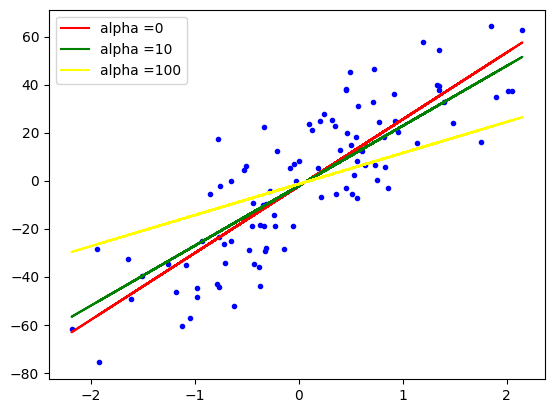

In [23]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color ='red',label ='alpha =0')
plt.plot(X,r1.predict(X),color ='green',label ='alpha =10')
plt.plot(X,r2.predict(X),color ='yellow',label ='alpha =100')
plt.legend()

In [24]:
class OwnRidge:
    def __init__(self,alpha =0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
    def fit(self ,X_train,y_train):

        num = 0
        den = 0
        for i  in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean()) - X_train.mean() 

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean()) 
        print(self.m ,self.b)
    def predict(self,X_test):
        pass

In [25]:
reg = OwnRidge(alpha =100)

In [26]:
reg.fit(X,y)

[25.66644038] [-2.16848818]


In [27]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score 
import numpy as np


X,y =load_diabetes(return_X_y =True)

In [28]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(X,y ,test_size= 0.2 , random_state= 2)

In [29]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha= 0.1 , solver= 'cholesky')

In [30]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [31]:
y_pred = reg.predict(X_test)

In [32]:
r2_score(y_test,y_pred)

0.6346801410772802

In [33]:
print(reg.coef_)
print(reg.intercept_)

[28.08885585]
-2.269134546759879


In [34]:
class MeraRidge :
    def __init__(self,alpha = 0):
        self.alpha = alpha
        self.coef_ = None
        self.intecept_ = None
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis = 1)
        I = np.identity(X_train.shape[1])
        I[0][0] =0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self. alpha *I).dot(X_train.T).dot(y_train)
        self.coef_ =result[1:]
        self.intercept_ = result[0]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [35]:
reg1 = MeraRidge()

In [36]:
reg1.fit(X_train,y_train)
y_pred = reg1.predict(X_test)

In [37]:
r2_score(y_test ,y_pred)

0.6345158782661013

In [38]:
reg1.coef_

array([28.12597332])

In [39]:
reg1.intercept_

-2.2710144261783833

## Ridge regressiom through gradient decent 

In [40]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np


In [41]:
X,y = load_diabetes(return_X_y=True)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [44]:
from sklearn.linear_model import SGDRegressor

In [45]:
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [46]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)


R2 score 0.4362593018343267
[  52.70006208 -155.50973809  366.25060569  266.79245441   -7.33716985
  -59.12406986 -168.77137926  136.7260453   330.38073985   99.81848019]
[167.8410306]


In [47]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [48]:


reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)



R2 score 0.46250101619914563
[  34.52192544 -290.84084076  482.40181344  368.0678662  -852.44873179
  501.59160336  180.11115788  270.76333979  759.73534372   37.4913546 ]
151.10198517439466


In [49]:
class MeraRidgeGD:
    
    def __init__(self,epochs,learning_rate,alpha):
        
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)
        
        X_train = np.insert(X_train,0,1,axis=1)
        
        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der
        
        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]
    
    def predict(self,X_test):
        
        return np.dot(X_test,self.coef_) + self.intercept_

In [50]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [51]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)


R2 score 0.4738018280260913
[  46.65050914 -221.3750037   452.12080647  325.54248128  -29.09464178
  -96.47517735 -190.90017011  146.32900372  400.80267299   95.09048094]
150.86975316713472


## 5 key points - Ridge regression 

1. how the cofficient get affected?
   * all the coffiecient shrink close to zero but not zero
2. Higher values are impacted more
3. Bias variance Tradeoff?  Bais decreases overfit increacse and vice a versa 
4. imapce on the loss function ?
5. Why called ridge?
apply it when the number of input is more than 2 